In [2]:
import pandas as pd

In [21]:
dfs = [pd.read_csv('%d.csv' % i) for i in range(0, 15)]

In [53]:

group_by_sizes = [
  df.groupby('type_name').agg(
    {
      'type_size': [lambda x: [i for i in x][0]],
      'count': ['sum']
    }
  ) for df in dfs
]

for df in group_by_sizes:
  df.columns = ['type_size', 'count']

for df in group_by_sizes:
  df['total_size'] = df['type_size'] * df['count']
  df.sort_values('total_size', ascending=False, inplace=True)

def IndexCol(df, col, index):
  df = pd.DataFrame(df[col])
  df.columns = ['%s_%d' % (col_name, index) for col_name in df.columns]
  return df

type_sizes = [IndexCol(group_by_sizes[i], 'type_size', i) for i in range(0, len(group_by_sizes))]
counts = [IndexCol(group_by_sizes[i], 'count', i) for i in range(0, len(group_by_sizes))]
total_sizes = [IndexCol(group_by_sizes[i], 'total_size', i) for i in range(0, len(group_by_sizes))]

In [58]:
result = total_sizes[0]
for i in range(1, len(total_sizes)):
  result = pd.concat([result, total_sizes[i]], axis=1)

In [59]:
result

,total_size_0,total_size_1,total_size_2,total_size_3,total_size_4,total_size_5,total_size_6,total_size_7,total_size_8,total_size_9,total_size_10,total_size_11,total_size_12,total_size_13,total_size_14
type_name,,,,,,,,,,,,,,,
_Entry,755600.0,959120.0,1000080.0,1000080.0,1250960.0,1250960.0,1250960.0,1250960.0,1434000.0,1434000.0,1434000.0,1761680.0,1761680.0,1762960.0,1679840.0
SourceMapping,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,99712.0,94784.0
Instruction,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0,74784.0
Entity,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,58128.0,50976.0
char,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,52257.0,50708.0
Class,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0,34816.0
Function,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,30528.0,28224.0
ModuleInfo,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0
LineInfo,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14992.0,14000.0


In [63]:
result_melted = result.reset_index().melt('type_name', var_name='iteration', value_name='total_size')

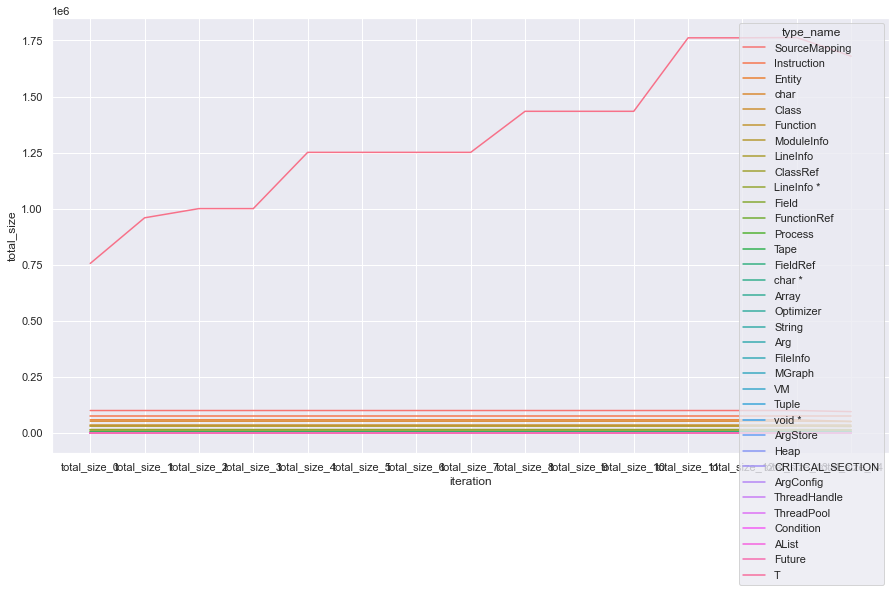

In [71]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(rc = {'figure.figsize':(20, 10)})
sb.lineplot(data=result_melted, x='iteration', y='total_size', hue='type_name')
plt.show()